# Classifying Heart Disease

In this guided project, we will demonstrate the functionality and effectiveness of Logistic Regression modeling in Python. We will be working with a real-world dataset from the UCI Machine Learning Repository, which can be downloaded [here](https://archive.ics.uci.edu/dataset/45/heart+disease). This dataset contains medical information related to heart disease, collected by the Cleveland Clinic Foundation.

Our objective is to build a Logistic Regression model capable of predicting whether a patient has heart disease. By doing so, we will highlight the practical applications of Logistic Regression and show how it can provide valuable insights that impact health and everyday decision-making.

This guided project is provided by Dataquest. They have already cleaned the dataset for use in this project, so we will work with their version to follow along more closely.

Let’s begin! 

### Set Up

The first step is to import the necessary libraries. Once that’s done, we’ll load the dataset and take our first look at the data.

In [1]:
# importing the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
# bringing in the data; hd (heart disease)
hd = pd.read_csv("heart_disease.csv")

With our libraries imported and data loaded, we can move on to Exploratory Data Analysis (EDA).

### EDA

The purpose of EDA is to familiarize ourselves with the dataset, record initial observations, and identify important details that may influence our model.

In [3]:
hd

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**`hd` – Observations:**

* Column names appear to be shorthand for longer terms, so we’ll need to confirm their full meanings.
* 303 rows and 15 columns.
* In the last row, the `ca` column contains a `?` instead of a numeric value. This may require further investigation.

In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


**`hd.info()` – Observations:**

* Most columns are integers.
* One column is a float, and two columns are objects.
* No null values are reported.

In [5]:
hd.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


**`hd.describe()` – Observations:**

* Several columns appear to be binary, such as `sex`, `fbs`, `exang`, and `present`.
* Some columns appear categorical, such as `cp`, `restecg`, and `slope`.
* `age` ranges from 29 to 77.

In [6]:
hd.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

**Dataset Column Definitions (from the [Official Page](https://archive.ics.uci.edu/dataset/45/heart+disease)):**

* **`Unnamed: 0`** – patient identification number
* **`age`** – age in years
* **`sex`** – sex (1 = male; 0 = female)
* **`cp`** – chest pain type:

  * 1: typical angina
  * 2: atypical angina
  * 3: non-anginal pain
  * 4: asymptomatic
* **`trestbps`** – resting blood pressure (mm Hg)
* **`chol`** – serum cholesterol in mg/dl
* **`fbs`** – fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* **`restecg`** – resting electrocardiographic results:

  * 0: normal
  * 1: ST-T wave abnormality
  * 2: probable or definite left ventricular hypertrophy (Estes' criteria)
* **`thalach`** – maximum heart rate achieved
* **`exang`** – exercise-induced angina (1 = yes; 0 = no)
* **`oldpeak`** – ST depression induced by exercise relative to rest
* **`slope`** – slope of the peak exercise ST segment:

  * 1: upsloping
  * 2: flat
  * 3: downsloping
* **`ca`** – number of major vessels (0–3) colored by fluoroscopy
* **`thal`** – thallium stress test result (3 = normal; 6 = fixed defect; 7 = reversible defect)
* **`present`** – diagnosis of heart disease:

  * 0: < 50% diameter narrowing (no disease)
  * 1: > 50% diameter narrowing (disease present)

### Column Title Correction and Data Cleaning

We now know more about our dataset, including size and definitions. Before proceeding, we’ll rename certain columns to make them clearer and easier to work with:

* `Unnamed: 0` → `id`
* `cp` → `chest_pain`
* `trestbps` → `resting_bp`
* `chol` → `cholesterol`
* `fbs` → `fasting_bs`
* `restecg` → `resting_ecg`
* `thalach` → `max_hr`
* `exang` → `exercise_chest_pain`
* `oldpeak` → `exercise_stress`
* `ca` → `num_vessels`
* `thal` → `thallium_stress`

We’ll apply these changes in the code below.

In [7]:
rename_dict = {
    'Unnamed: 0': 'id',
    'cp': 'chest_pain',
    'trestbps': 'resting_bp',
    'chol': 'cholestoral',
    'fbs': 'fasting_bs',
    'restecg': 'resting_ecg',
    'thalach': 'max_hr',
    'exang': 'exercise_chest_pain',
    'oldpeak': 'exercise_stress',
    'ca': 'num_vessels',
    'thal': 'thallium_stress'
}

hd.rename(columns=rename_dict, inplace=True)

In [8]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   303 non-null    int64  
 1   age                  303 non-null    int64  
 2   sex                  303 non-null    int64  
 3   chest_pain           303 non-null    int64  
 4   resting_bp           303 non-null    int64  
 5   cholestoral          303 non-null    int64  
 6   fasting_bs           303 non-null    int64  
 7   resting_ecg          303 non-null    int64  
 8   max_hr               303 non-null    int64  
 9   exercise_chest_pain  303 non-null    int64  
 10  exercise_stress      303 non-null    float64
 11  slope                303 non-null    int64  
 12  num_vessels          303 non-null    object 
 13  thallium_stress      303 non-null    object 
 14  present              303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memo

In [9]:
hd

,id,age,sex,chest_pain,resting_bp,cholestoral,fasting_bs,resting_ecg,max_hr,exercise_chest_pain,exercise_stress,slope,num_vessels,thallium_stress,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,302,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


Earlier, we noticed a `?` value in the `num_vessels` column. Although no null values were reported, this `?` represents missing data. In the next step, we’ll check the unique values of all columns (except the `id` column) to determine whether these placeholders occur elsewhere and if they should be addressed.

In [10]:
values_df = hd.drop(['id'], axis=1)

unique_values = {col: values_df[col].unique() for col in values_df.columns}

# Display the unique values
for col, values in unique_values.items():
    print(f"\033[1mUnique values in {col}:\033[0m {values}")

Unique values in age: [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
Unique values in sex: [1 0]
Unique values in chest_pain: [1 4 3 2]
Unique values in resting_bp: [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
Unique values in cholestoral: [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 200
 262 215 22

The results show that only `num_vessels` and `thallium_stress` contain `?` values. These two columns are also the only ones stored as object data types. Since all other values in these columns are numeric, it is likely that the `?` entries are the reason they were classified as objects. We will now examine how many times the `?` value appears.

In [11]:
# Count unique values in num_vessels
num_vessels = hd['num_vessels'].value_counts().reset_index()
num_vessels.columns = ['Value', 'Count']

# Count unique values in thallium_stress
thallium_stress = hd['thallium_stress'].value_counts().reset_index()
thallium_stress.columns = ['Value', 'Count']

# Display the counts
print("Value counts for num_vessels:")
print(num_vessels)

print("\nValue counts for thallium_stress:")
print(thallium_stress)

Value counts for num_vessels:
  Value  Count
0   0.0    176
1   1.0     65
2   2.0     38
3   3.0     20
4     ?      4

Value counts for thallium_stress:
  Value  Count
0   3.0    166
1   7.0    117
2   6.0     18
3     ?      2


The counts reveal that `num_vessels` contains 4 `?` values, while `thallium_stress` contains 2. Since these are very few instances (6 in total), they likely correspond to missing records for a handful of patients. We will drop these rows and then convert both columns to numeric float types.

In [12]:
hd_clean = hd.copy()

# Drop rows with '?' in either num_vessels or thallium_stress
hd_clean = hd_clean[(hd_clean['num_vessels'] != '?') & (hd_clean['thallium_stress'] != '?')]

# Convert num_vessels and thallium_stress to float
hd_clean['num_vessels'] = hd_clean['num_vessels'].astype(float)
hd_clean['thallium_stress'] = hd_clean['thallium_stress'].astype(float)

hd_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   297 non-null    int64  
 1   age                  297 non-null    int64  
 2   sex                  297 non-null    int64  
 3   chest_pain           297 non-null    int64  
 4   resting_bp           297 non-null    int64  
 5   cholestoral          297 non-null    int64  
 6   fasting_bs           297 non-null    int64  
 7   resting_ecg          297 non-null    int64  
 8   max_hr               297 non-null    int64  
 9   exercise_chest_pain  297 non-null    int64  
 10  exercise_stress      297 non-null    float64
 11  slope                297 non-null    int64  
 12  num_vessels          297 non-null    float64
 13  thallium_stress      297 non-null    float64
 14  present              297 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 37.1 K

In [13]:
hd_clean

,id,age,sex,chest_pain,resting_bp,cholestoral,fasting_bs,resting_ecg,max_hr,exercise_chest_pain,exercise_stress,slope,num_vessels,thallium_stress,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,299,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,300,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,301,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


With our dataset now cleaned and prepped, we are ready to move on.

### Relationships & Correlations

Our goal is to build the most accurate model possible. The features we choose play a critical role in determining accuracy, since the model relies on them to make predictions.

In this section, we’ll identify the features to include in our first model. While our selection may change later, exploring relationships and correlations now will give us valuable insights to adjust more effectively during model development.

We’ll begin by looking at the distribution of our target variable, `present`, which indicates whether a patient has heart disease.

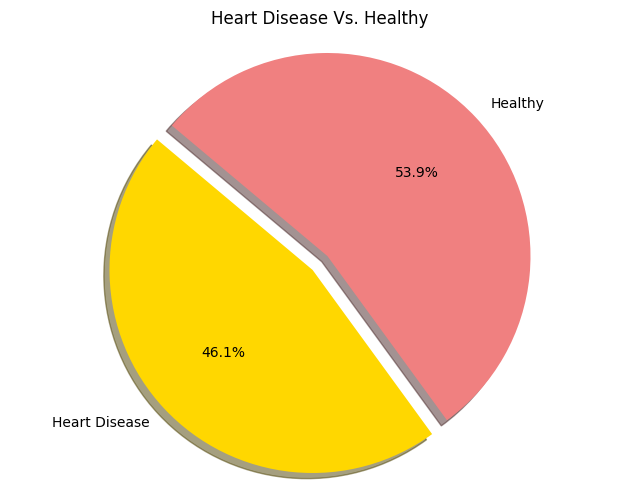

In [14]:
# calculating the percentages of healthy patients and those with heart disease
heart_disease_pct = len(hd_clean[hd_clean['present'] == 1])/len(hd_clean['present'])
heart_disease_pct = heart_disease_pct*100
healthy_pct = len(hd_clean[hd_clean['present'] == 0])/len(hd_clean['present'])
healthy_pct = healthy_pct*100

# generating visualization of percentages
labels = ['Heart Disease', 'Healthy']
sizes = [heart_disease_pct, healthy_pct]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  
plt.title('Heart Disease Vs. Healthy')
plt.show()

In [15]:
# Count unique values in present
present_count = hd_clean['present'].value_counts().reset_index()
present_count.columns = ['Value', 'Count']

# Display the counts
print("Value counts for present:")
print(present_count)

Value counts for present:
   Value  Count
0      0    160
1      1    137


In the `present` column, `0` represents a healthy patient, while `1` indicates heart disease. The distribution shows nearly equal numbers of healthy and unhealthy patients, which is beneficial for training a balanced model.

Next, we will examine the average values of each feature grouped by `present`. Features showing the largest differences between healthy and unhealthy patients will be considered for inclusion.

In [16]:
mean_values = hd_clean.groupby("present").agg(
    {
        'age': "mean",
        'sex': "mean",
        'chest_pain': "mean",
        'resting_bp': "mean",
        'cholestoral': "mean",
        'fasting_bs': "mean",
        'resting_ecg': "mean",
        'max_hr': "mean",
        'exercise_chest_pain': "mean",
        'exercise_stress': "mean",
        'slope': "mean",
        'num_vessels': "mean",
        'thallium_stress': "mean"
    }
)

mean_values

,age,sex,chest_pain,resting_bp,cholestoral,fasting_bs,resting_ecg,max_hr,exercise_chest_pain,exercise_stress,slope,num_vessels,thallium_stress
present,,,,,,,,,,,,,
0,52.643750,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,1.412500,0.275000,3.787500
1,56.759124,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,1.824818,1.145985,5.832117


In [17]:
# Calculate the difference in averages
difference_in_averages = mean_values.loc[1] - mean_values.loc[0]

difference_in_averages

age                     4.115374
sex                     0.261268
chest_pain              0.790192
resting_bp              5.460036
cholestoral             8.360265
fasting_bs              0.002235
resting_ecg             0.331432
max_hr                -19.471761
exercise_chest_pain     0.396396
exercise_stress         0.990301
slope                   0.412318
num_vessels             0.870985
thallium_stress         2.044617
dtype: float64

Based on our analysis, we will use the following features in our initial model:

* `age`
* `resting_bp`
* `cholesterol`
* `max_hr`
* `thallium_stress`

We may revisit and adjust these selections later depending on performance.

### Partitioning the Data

Now that we’ve selected our features, we will split the dataset into training and testing sets. The training set (70%) will be used to fit the model, while the testing set (30%) will evaluate its performance.

In [18]:
# defining our features for model 1
X1 = hd_clean[['age', 'resting_bp', 'cholestoral', 'max_hr', 'thallium_stress']]
y1 = hd_clean['present']

# splitting our data for model 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=1)

After splitting, we check that both sets contain a balanced distribution of healthy and unhealthy patients.

In [19]:
# viewing the sizes of our data portions for model 1
print(f"Training label healthy: {sum(y_train1 == 0)} values or {((sum(y_train1 == 1)/len(y_train1))*100):.2f}%")
print(f"Training label unhealthy: {sum(y_train1 == 1)} values or {((sum(y_train1 == 0)/len(y_train1))*100):.2f}%")
print('\n')
print(f"Testing label healthy: {sum(y_test1 == 0)} values or {((sum(y_test1 == 1)/len(y_test1))*100):.2f}%")
print(f"Testing label unhealthy: {sum(y_test1 == 1)} values or {((sum(y_test1 == 0)/len(y_test1))*100):.2f}%")

Training label healthy: 109 values or 47.34%
Training label unhealthy: 98 values or 52.66%


Testing label healthy: 51 values or 43.33%
Testing label unhealthy: 39 values or 56.67%


The split looks balanced, so we can proceed with training our first model.

In [20]:
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

LogisticRegression()

### Accuracy

We trained our model on the training data using the selected features. To evaluate its performance, we’ll calculate Accuracy, Sensitivity, and Specificity. To simplify the process, we’ll define a custom function to generate these metrics.

In [21]:
# Function to calculate accuracy metrics
def accuracy_metrics(X, y, model, model_name):
    acc = model.score(X, y)

    predictions = model.predict(X)
    tp = sum((predictions == 1) & (y == 1))
    fp = sum((predictions == 1) & (y == 0))
    tn = sum((predictions == 0) & (y == 0))
    fn = sum((predictions == 0) & (y == 1))

    sens = tp / (tp + fn)
    spec = tn / (tn + fp)
    
    metrics_series = pd.Series({
        'Accuracy': acc,
        'Sensitivity': sens,
        'Specificity': spec
    }, name=model_name)
    
    return metrics_series

In [22]:
# using our accuracy function to calculate the accuracy of our model on the training data
model1_train_accuracy = accuracy_metrics(X=X_train1, y=y_train1, model=model1, model_name='Model 1')
model1_train_accuracy

Accuracy       0.772947
Sensitivity    0.765306
Specificity    0.779817
Name: Model 1, dtype: float64

Before interpreting results, let’s review the metrics:

* **Accuracy** – proportion of all predictions that were correct.
* **Sensitivity** – proportion of actual positive cases correctly identified.
* **Specificity** – proportion of actual negative cases correctly identified.

In this dataset:

* A **positive case** = patient with heart disease (`1`)
* A **negative case** = healthy patient (`0`)

Our initial training accuracy scores are all around 0.77, which is a solid starting point. Since these results are from training data, we expect slightly lower accuracy on unseen test data.

### Model 1

We now evaluate the model on the test data.

In [23]:
model1_test_accuracy = accuracy_metrics(X=X_test1, y=y_test1, model=model1, model_name='Model 1')
model1_test_accuracy

Accuracy       0.766667
Sensitivity    0.769231
Specificity    0.764706
Name: Model 1, dtype: float64

As expected, test accuracy dropped slightly but remained strong. Next, we will try to improve performance by adjusting the feature set. If the second model outperforms this one, it will become our final model.

### Model Coefficients Interpretation

Before building a second model, we want to interpret the coefficients from Model 1. We’ll examine them on both the **odds scale** and **log-odds scale**:

* **Odds scale** – the probability of an event occurring versus not occurring.
* **Log-odds scale** – the natural logarithm of the odds, which normalizes coefficients for easier comparison.

We will calculate the two scales in the code below.

In [24]:
coefs = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'thallium_stress']

log_odds = {}
# Checking in terms of log-odds
for coef, val  in zip(coefs, model1.coef_[0]):
    log_odds[coef] = round(val, 2)

odds = {}
# Checking in terms of odds
for coef, val  in zip(coefs, model1.coef_[0]):
    odds[coef] = round(np.exp(val), 2)

# Create a DataFrame from the two scale dictionaries
coefficients = pd.DataFrame({
    'Odds': odds.values(),
    'Log Odds': log_odds.values()
}, index=odds.keys())

coefficients

,Odds,Log Odds
age,1.01,0.01
resting_bp,1.02,0.02
cholestoral,1.00,0.00
max_hr,0.96,-0.04
thallium_stress,1.70,0.53


Interpretation framework:

* Odds > 1 → probability of disease increases with the feature
* Odds < 1 → probability of disease decreases with the feature
* Odds = 1 → feature has no effect

Our observations:

* `age` & `resting_bp` – very small positive contributions.
* `cholesterol` – odds = 1.0, log-odds = 0.0 → no effect.
* `max_hr` – odds = 0.96, log-odds = -0.04 → higher max heart rate reduces probability of disease.
* `thallium_stress` – odds = 1.70, log-odds = 0.53 → strongly increases probability of disease, most impactful feature.

These insights suggest that we might exclude `cholesterol` from the next model.

### Model 2

In the code below, we will create a dataframe for accuracy, which will allow us to better compare the accuracy metrics of Models 1 and 2.

In [25]:
# Create an empty DataFrame
accuracy_df = pd.DataFrame()

# add model 1 test accuracy to the dataframe
accuracy_df = pd.concat([accuracy_df, model1_test_accuracy.to_frame().T])

For Model 2, we expand the feature set to include any column with an average difference of `0.5` or higher, while removing `age` and `cholesterol` due to their minimal coefficient contributions.

In [26]:
difference_in_averages

age                     4.115374
sex                     0.261268
chest_pain              0.790192
resting_bp              5.460036
cholestoral             8.360265
fasting_bs              0.002235
resting_ecg             0.331432
max_hr                -19.471761
exercise_chest_pain     0.396396
exercise_stress         0.990301
slope                   0.412318
num_vessels             0.870985
thallium_stress         2.044617
dtype: float64

In [27]:
# defining our features for model 2
X2 = hd_clean[['chest_pain', 'resting_bp', 'max_hr', 'exercise_stress', 'num_vessels', 'thallium_stress']]
y2 = hd_clean['present']

# splitting our data for model 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)

# initiating our second model
model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

LogisticRegression()

We will first evaluate Model 2 on the training data, then compare its performance with Model 1 using a combined accuracy dataframe.

In [28]:
# using our accuracy function to calculate the accuracy of model 2 on the training data
model2_train_accuracy = accuracy_metrics(X=X_train2, y=y_train2, model=model2, model_name='Model 2')
model2_train_accuracy

Accuracy       0.845411
Sensitivity    0.795918
Specificity    0.889908
Name: Model 2, dtype: float64

Training results suggest Model 2 outperforms Model 1. Next, we’ll test it on the unseen data.

In [29]:
# calculate model 2 test accuracy
model2_test_accuracy = accuracy_metrics(X=X_test2, y=y_test2, model=model2, model_name='Model 2')

# calculate and add model 2 test accuracy to the dataframe
accuracy_df = pd.concat([accuracy_df, model2_test_accuracy.to_frame().T])
accuracy_df

,Accuracy,Sensitivity,Specificity
Model 1,0.766667,0.769231,0.764706
Model 2,0.844444,0.820513,0.862745


Although accuracy dipped slightly on the test set, Model 2 still performed better overall than Model 1. The sensitivity and specificity values show that it was somewhat better at classifying healthy patients than unhealthy ones, but both remain at strong levels.

Therefore, Model 2 will serve as our final model.

In [30]:
final_accuracy = accuracy_df['Accuracy']['Model 2']
print(f"\033[1mFinal Model Accuracy: {final_accuracy*100:.2f}%\033[0m")

Final Model Accuracy: 84.44%


### Conclusion

Throughout this project, we have demonstrated the process of using **Logistic Regression Modeling** in **Python**. We explored the data, cleaned it, prepared it, and then built our initial model. After studying various aspects of our model, we reevaluated our approach and developed a second, improved model. Our final model achieved an accuracy of **84.44%**, representing a significant improvement over the first model.

As expected, the model provides a clear interpretation with two possible outcomes: (1) the patient has heart disease, or (0) the patient does not. The final model also predicts healthy patients with slightly greater accuracy than unhealthy patients, though the difference is not alarming. This discrepancy may be due to the slightly higher number of healthy cases in the dataset compared to unhealthy cases.

We interpret the final accuracy of **84.44%** to mean that the model correctly predicts whether a patient has heart disease **84%** of the time. While it is true that our model could likely be improved further, achieving an accuracy of **84.44%** with the resources available to us is a commendable accomplishment and serves as a solid foundation for future development.

Although it may not be the most reliable model globally, there is a good chance it can indicate whether you are at risk for heart disease based on the data provided, which is reassuring. It could serve as a valuable tool for health experts in a clinical setting. We hope you have enjoyed this model-building journey with us and feel inspired to create even greater impacts in your own projects!